In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [5]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [3]:
# Checking the amount of rows and columns

df.shape

(48895, 16)

In [4]:
# Descriptive Statistics

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
# Checking for the null values

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
# Null Value Percentage

round(100*(df.isnull().sum()/len(df)),2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [7]:
# Checking for the data-types

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [34]:
# Dropping the columns that could be insignificant or unethical for the future use

df.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [36]:
df.shape

(48895, 13)

In [9]:
# Examining the dataframe

df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
# Repalcing the missing values of Reviews_per_month with 0

df.fillna({'review_per_month':0}, inplace=True)

### Q1. Which type of hosts to acquire more and where?

In [11]:
top_host = df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [12]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


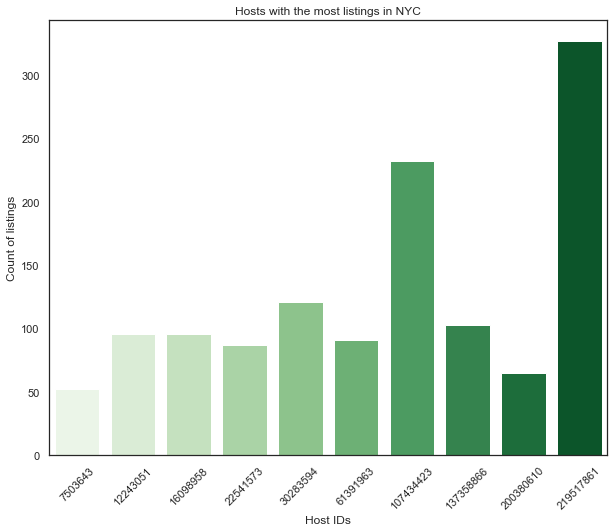

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Greens')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

plt.show()

In [37]:
# Analysis of the Neighbourhood_group column

df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


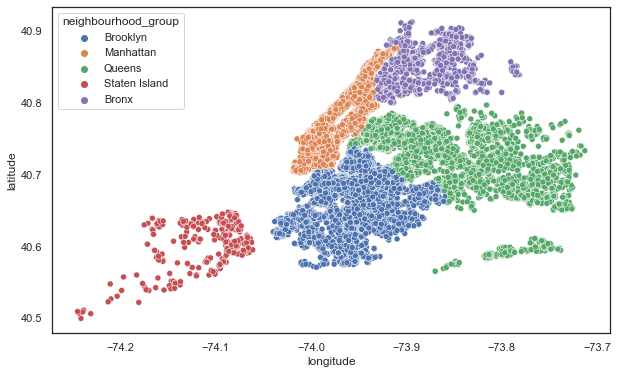

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


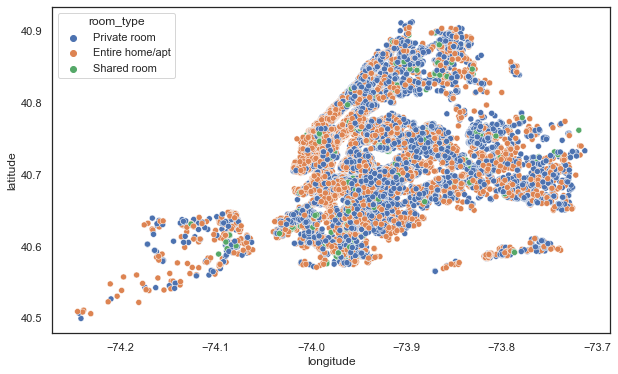

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


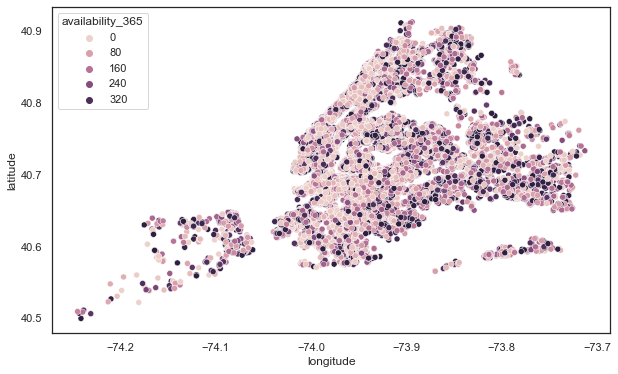

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

### Q2. 

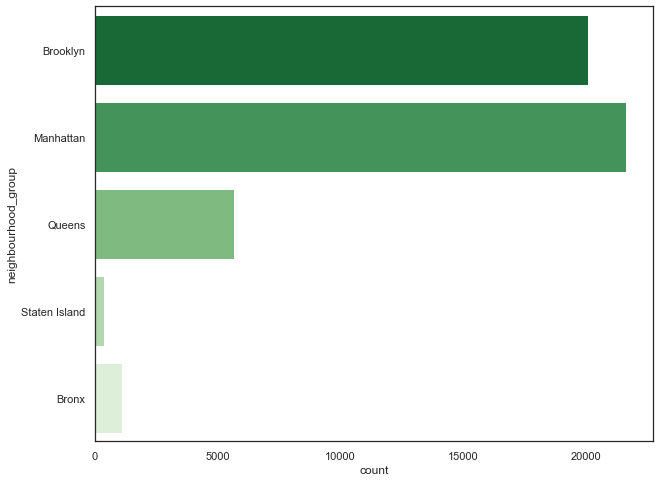

In [17]:
# What are the neighbourhoods they need to target?

sns.countplot(y='neighbourhood_group',data=df, palette='Greens_r')

plt.show()

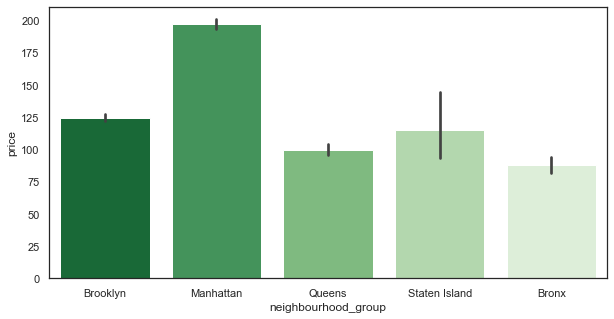

In [18]:
# Does price affects the neighbourhood

plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group', y="price", data=df, palette='Greens_r')
plt.show()

In [6]:
# Types of rooms

df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

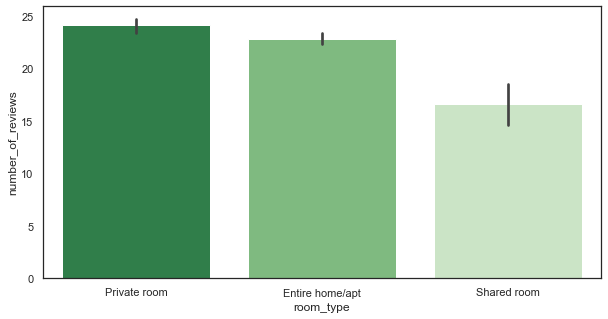

In [19]:
# Does reviews affect the room_type
# The various kinds of properties that exist w.r.t. customer preferences.

plt.figure(figsize=(10,5))
sns.barplot(x='room_type', y="number_of_reviews", data=df, palette='Greens_r')
plt.show()

So now it is clear that entire home and private room has good reviews, this might be the possible reason for individuals to prefer entire and private room over shared room.

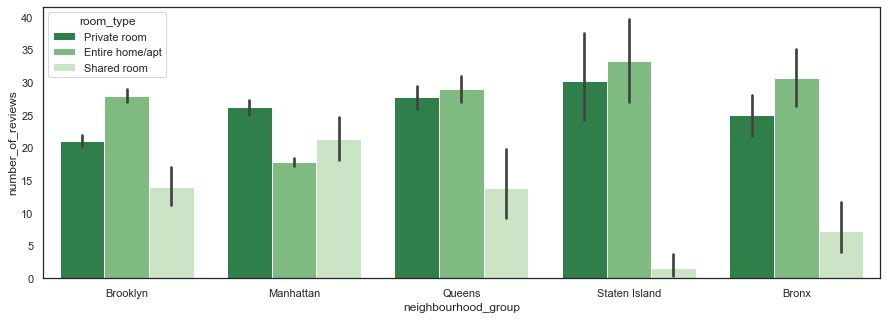

In [20]:
# Does reviews affect the room_type.

plt.figure(figsize=(15,5))
sns.barplot(x='neighbourhood_group', y="number_of_reviews", hue = 'room_type', data=df, palette='Greens_r')
plt.show()

In [21]:
# Price ranges customers prefer

df["price"] = df["price"].astype(int,copy=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

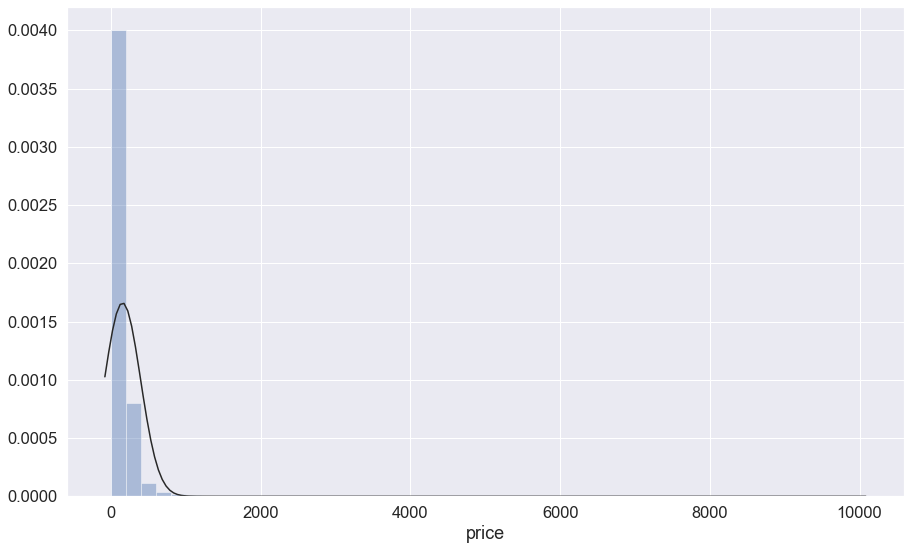

In [22]:
#Price range

sns.set(font_scale=1.5) 
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(15, 9))

sns.distplot(a=df.price, kde=False, fit=norm)

In [23]:
print(df['price'].quantile(0.25))
print(df['price'].quantile(0.75))

69.0
175.0


In [24]:
df["price"] = np.where(df["price"] <69.0, 69.0,df['price'])
df["price"] = np.where(df["price"] >175.0, 175.0,df['price'])

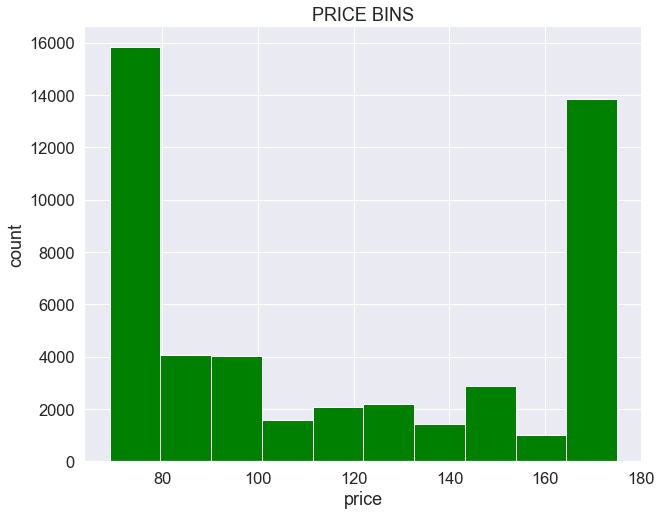

In [25]:
plt.hist(df["price"],color='Green')

plt.xlabel("price")
plt.ylabel("count")

plt.title("PRICE BINS")
plt.show()

In [26]:
bins = np.linspace(min(df["price"]),max(df["price"]),4)
bins

array([ 69.        , 104.33333333, 139.66666667, 175.        ])

In [27]:
group_names = ['Low', 'Medium', 'High']

In [28]:
df['price_binned'] = pd.cut(df['price'], bins, labels=group_names ,include_lowest = True)
df[['price','price_binned']].head(20)

,price,price_binned
0,149.0,High
1,175.0,High
2,150.0,High
3,89.0,Low
4,80.0,Low
5,175.0,High
6,69.0,Low
7,79.0,Low
8,79.0,Low
9,150.0,High


In [29]:
df['price_binned'].value_counts()

Low       24112
High      18362
Medium     6421
Name: price_binned, dtype: int64

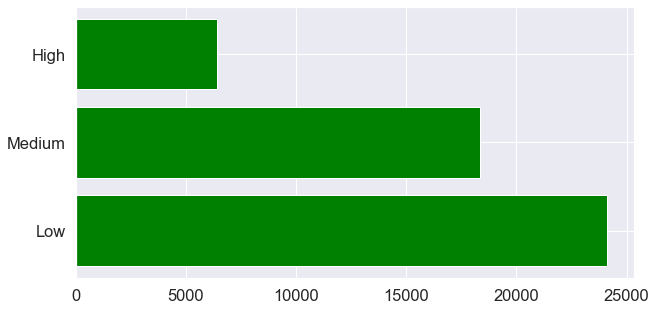

In [30]:
plt.figure(figsize=(10,5))

plt.barh(group_names, df["price_binned"].value_counts(),color='Green')
plt.show()